## Simple multi-layered-perceptron with Focal Loss criterion

paper reference: https://arxiv.org/pdf/1708.02002.pdf  
**brief explanation on the loss function:** 
- Focal loss is a modified CrossEntropy loss  
- Recall that cross entropy is $CE = \begin{cases}
      -log(p) & \text{if $y$==1}\\
      -log(1-p) & \text{otherwise}\\
    \end{cases} $  
    - for convenience we define $p_t$ to be $p$ when y==1 and $1-p$ otherwise. Therefore $CE = -\log(p_t)$
- A common regularization method to counteract class imbalance from cross entropy would be to put in a regularizer $\alpha \in [0, 1)$ in front  of CE such that the weight of CE is $alpha$ for y==1 and $1-alpha$ otherwise
- researchers published the above mentioned paper stated that 
    - `the large class imbalance encountered during training of dense detectors overwhelms the cross entropy loss. Easily classified negatives comprise the majority of the loss and dominate the gradient. While α balances the importance of positive/negative examples, it does not differentiate between easy/hard examples`
- Therefore, focal loss is postulated with the following formulation
    - $FL = -(\alpha)(1-p_t)^\gamma CE = -(\alpha)(1-p_t)^\gamma \log(p_t)$

In [52]:
# overall utility package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# pytorch library
import torch
from torch import nn
import pandas as pd
# import customm utility packages
from src.FocalLoss import *
from src.custom_dataset import CustomDataset
from src.model import BaseMLP
from src.deployment import *

%matplotlib inline
%load_ext autoreload
%autoreload 2
SEED = 666

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# train = pd.read_csv('train.csv')
# stratify_columns = ['y']
# train, val = train_test_split(train, test_size=0.10, stratify=train[stratify_columns], random_state=SEED)
# val.to_csv('validation.csv', index=False)
# train.to_csv('train_subset.csv', index=False)

In [19]:
train = pd.read_csv('train_subset.csv')
val = pd.read_csv('validation.csv')

In [20]:
test = pd.read_csv('hold_out.csv')

In [21]:
test.shape

(38052, 22)

In [22]:
train.shape

(194065, 22)

Epoch: 10: Train loss: 0.017310392730040102, Validation loss: 0.017563376722509353
Epoch: 20: Train loss: 0.017040720826833857, Validation loss: 0.01712629098523327
Epoch: 30: Train loss: 0.016960414123606056, Validation loss: 0.017037112907108003
Epoch: 40: Train loss: 0.016924632749838266, Validation loss: 0.01702365165578066
Epoch: 50: Train loss: 0.016907882173031456, Validation loss: 0.01706396721467103
Epoch: 60: Train loss: 0.016900118460011136, Validation loss: 0.017100177022987283
Epoch: 70: Train loss: 0.016897589038682843, Validation loss: 0.01701719789549028
Epoch: 80: Train loss: 0.016889219300825455, Validation loss: 0.01699983935619026
Epoch: 90: Train loss: 0.016882958261530773, Validation loss: 0.017000478017715998
Epoch: 100: Train loss: 0.016876312017631023, Validation loss: 0.016957657811403324
training finished


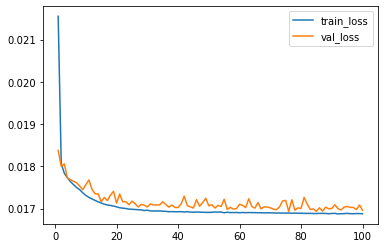

In [37]:
net = mlp_run(train, val, batch_size=10, num_iter=100, gamma=4, gpu=False)

model is alright after ~30 epochs

In [ ]:
net = mlp_run(train, val, batch_size=32, num_iter=50, gamma=5, gpu=False)

Epoch: 10: Train loss: 0.008688955826597304, Validation loss: 0.00875820499569874
Epoch: 20: Train loss: 0.008628931806921062, Validation loss: 0.008712863988997498
Epoch: 30: Train loss: 0.008612959347519432, Validation loss: 0.008683129488034532
Epoch: 40: Train loss: 0.008602786301892413, Validation loss: 0.008672056229818247


In [ ]:
net = mlp_run(train, val, batch_size=32, num_iter=50, gamma=5, gpu=False)

Well shit I'm depressed

### Ref
batch size vs training behavior https://medium.com/mini-distill/effect-of-batch-size-on-training-dynamics-21c14f7a716e  
paper for focal loss: https://arxiv.org/pdf/1708.02002.pdf